Lab 3 - Clustering/Manifold Learning, Denis O Sullivan, 19244703

# Note relating to the derived feature from lab 2
My derived feature is called pdaysNew, this feature makes a copy of pdays, changes all instances of -1 with 999 in accordance with the UCI machine learning repository (indicating the client was not previously contacted). The feature is then split into 2 bins labeled Contacted recently for 0 to 365 and 365 to 999 for Contacted long

# Import dataset/modules

In [2]:
#To remove warning when working on my home machine
import os
os.environ["OMP_NUM_THREADS"] = '8'

#To remove future warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn.cluster import MeanShift #second clustering algorithm MeanShift

# Load the dataset

In [89]:
#Load the previous prepared bank dataset appropiately names 'bank_prepared'
df = pd.read_csv('bank_prepared.csv')

My Derived feature is categorical, so I need to one hot encode it before I start 

In [90]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,0,1,0,1,0,0,Contacted recently
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,0,1,1,0,Contacted recently
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,0,1,0,0,1,1,0,Contacted recently
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,0,1,0,0,1,1,0,Contacted recently
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,0,1,0,0,1,0,0,Contacted recently


In [5]:
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew
1995,20.0,1.283472,16,9,0.864320,0.693147,-1,0.0,0,0,...,0,0,1,0,1,0,0,0,1,Contacted long
1996,28.0,0.569369,16,9,1.901403,0.693147,-1,0.0,0,0,...,0,0,1,0,1,0,0,0,1,Contacted long
1997,81.0,0.907800,17,9,0.673645,0.000000,-1,0.0,0,0,...,0,0,1,1,0,0,0,0,1,Contacted long
1998,46.0,1.545186,20,9,0.567555,0.000000,-1,0.0,0,0,...,0,0,1,1,0,0,1,0,1,Contacted long
1999,40.0,1.810978,22,9,0.622006,0.693147,-1,0.0,0,1,...,0,0,1,1,0,0,0,0,1,Contacted long


In [6]:
#one hot encoding my derived feature (which was categorical) to numerical as it is presumed the input will be numeric
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,0,1,0,1,0,0,1
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,0,1,1,0,1
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,0,1,0,0,1,1,0,1
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,0,1,0,0,1,1,0,1
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,0,1,0,0,1,0,0,1


In [8]:
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently
1995,20.0,1.283472,16,9,0.864320,0.693147,-1,0.0,0,0,...,0,0,1,0,1,0,0,0,1,0
1996,28.0,0.569369,16,9,1.901403,0.693147,-1,0.0,0,0,...,0,0,1,0,1,0,0,0,1,0
1997,81.0,0.907800,17,9,0.673645,0.000000,-1,0.0,0,0,...,0,0,1,1,0,0,0,0,1,0
1998,46.0,1.545186,20,9,0.567555,0.000000,-1,0.0,0,0,...,0,0,1,1,0,0,1,0,1,0
1999,40.0,1.810978,22,9,0.622006,0.693147,-1,0.0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [9]:
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (2000, 34)


# Rescale the data
Unnessecary due to the dataset already being prepared for ML

In [10]:
#min_max_scaler = preprocessing.MinMaxScaler()
#data = min_max_scaler.fit_transform(data)

#object = preprocessing.StandardScaler()
#data = object.fit_transform(data)

# Scatterplot function

In [11]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# K Means Clustering
For a good model, we want a low inertia value and a low number of clusters

# K Value = 2

In [12]:
#Selected K value
k = 2

In [13]:
#K means
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [14]:
#Project data to 2D space
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [15]:
#Apply MDS to the data and k means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


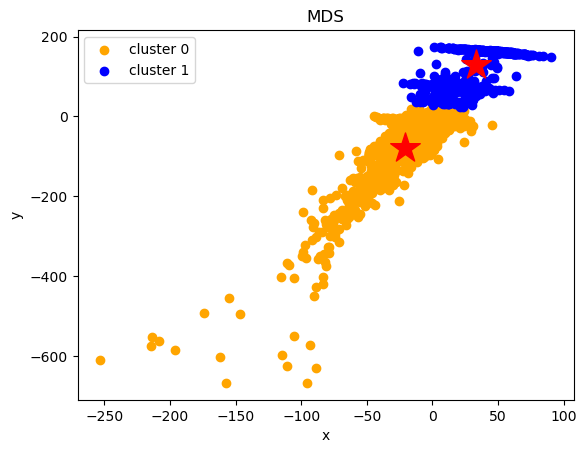

In [16]:
#Plot the transformation
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [17]:
#Apply T-SNE to the data and k means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


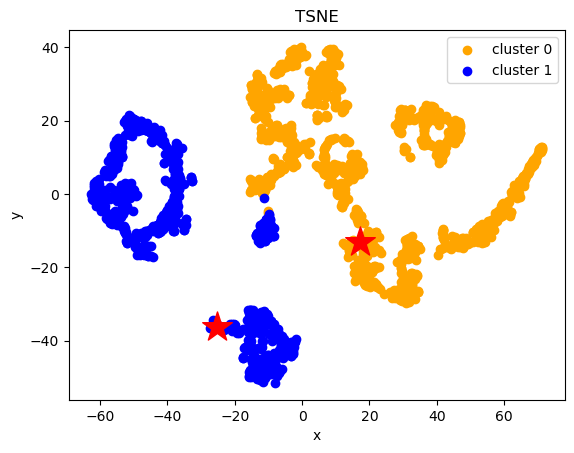

In [18]:
#Plot the transformation
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [19]:
#Adding the cluster layer to the original dataframe
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [20]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,1,0,1,0,0,1,1
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,1,1,0,1,1
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,1,0,0,1,1,0,1,0
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,1,0,0,1,1,0,1,0
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,1,0,0,1,0,0,1,0


In [21]:
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
1995,20.0,1.283472,16,9,0.864320,0.693147,-1,0.0,0,0,...,0,1,0,1,0,0,0,1,0,1
1996,28.0,0.569369,16,9,1.901403,0.693147,-1,0.0,0,0,...,0,1,0,1,0,0,0,1,0,1
1997,81.0,0.907800,17,9,0.673645,0.000000,-1,0.0,0,0,...,0,1,1,0,0,0,0,1,0,1
1998,46.0,1.545186,20,9,0.567555,0.000000,-1,0.0,0,0,...,0,1,1,0,0,1,0,1,0,1
1999,40.0,1.810978,22,9,0.622006,0.693147,-1,0.0,0,1,...,0,1,1,0,0,0,0,1,0,1


In [22]:
#Grouping via mean
df.groupby('cluster').mean()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently
cluster,,,,,,,,,,,,,,,,,,,,,
0,42.113360,0.843678,14.517409,4.177328,0.685596,0.497409,249.636437,0.82425,0.153036,0.022672,...,0.081781,0.229150,0.000000,0.576518,0.304453,0.007287,0.557085,0.162753,0.394332,0.912551
1,41.154248,0.897733,12.776471,6.334641,0.793395,0.413500,35.935948,0.40727,0.142484,0.022222,...,0.060131,0.210458,0.593464,0.521569,0.389542,0.007843,0.359477,0.064052,0.670588,0.406536


# Next K value = 4

In [23]:
#Selected K value
k = 4

In [24]:
#K means
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [25]:
#Project data to 2D space
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [26]:
#Apply MDS to the data and k means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


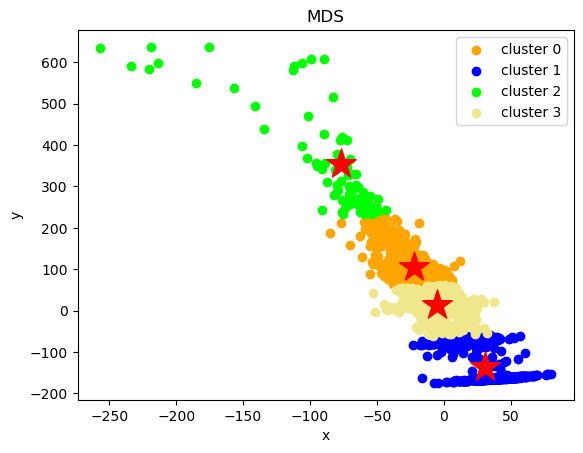

In [27]:
#Plot the transformation
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [28]:
#Apply T-SNE to the data and k means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


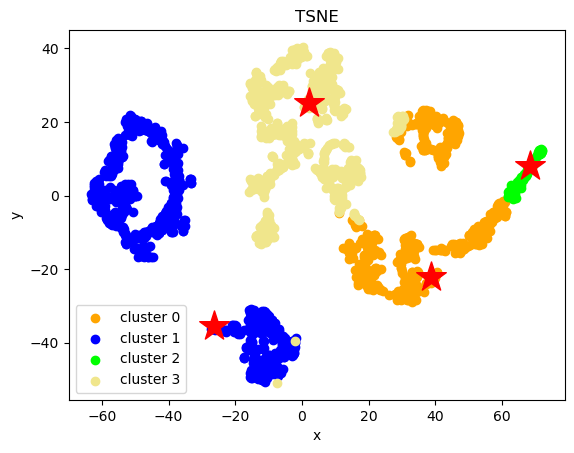

In [29]:
#Plot the transformation
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [30]:
#Adding the cluster layer to the original dataframe
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [31]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,1,0,1,0,0,1,3
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,1,1,0,1,3
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,1,0,0,1,1,0,1,0
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,1,0,0,1,1,0,1,0
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,1,0,0,1,0,0,1,0


In [32]:
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
1995,20.0,1.283472,16,9,0.864320,0.693147,-1,0.0,0,0,...,0,1,0,1,0,0,0,1,0,1
1996,28.0,0.569369,16,9,1.901403,0.693147,-1,0.0,0,0,...,0,1,0,1,0,0,0,1,0,1
1997,81.0,0.907800,17,9,0.673645,0.000000,-1,0.0,0,0,...,0,1,1,0,0,0,0,1,0,1
1998,46.0,1.545186,20,9,0.567555,0.000000,-1,0.0,0,0,...,0,1,1,0,0,1,0,1,0,1
1999,40.0,1.810978,22,9,0.622006,0.693147,-1,0.0,0,1,...,0,1,1,0,0,0,0,1,0,1


In [33]:
#Grouping via mean
df.groupby('cluster').mean()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently
cluster,,,,,,,,,,,,,,,,,,,,,
0,40.758621,0.796520,13.578947,2.887477,0.609802,0.497019,275.027223,0.739200,0.214156,0.014519,...,0.074410,0.079855,0.000000,0.553539,0.313975,0.009074,0.793103,0.176044,0.186933,0.950998
1,40.873061,0.896798,12.819464,6.244006,0.795880,0.413313,28.722144,0.368175,0.149506,0.022567,...,0.050776,0.212976,0.640339,0.511989,0.400564,0.007052,0.355430,0.056417,0.695346,0.359661
2,38.814815,0.929314,15.296296,7.469136,0.844838,0.444006,531.555556,0.734259,0.061728,0.012346,...,0.222222,0.209877,0.000000,0.419753,0.493827,0.012346,0.395062,0.037037,0.987654,0.000000
3,43.872534,0.878182,15.012140,5.132018,0.735883,0.497370,183.356601,0.913049,0.104704,0.030349,...,0.078907,0.352049,0.000000,0.620637,0.268589,0.006070,0.367223,0.166920,0.491654,1.000000


# Next K value = 3

In [34]:
#Selected K value
k = 3

In [35]:
#K means
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [36]:
#Project data to 2D space
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [37]:
#Apply MDS to the data and k means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


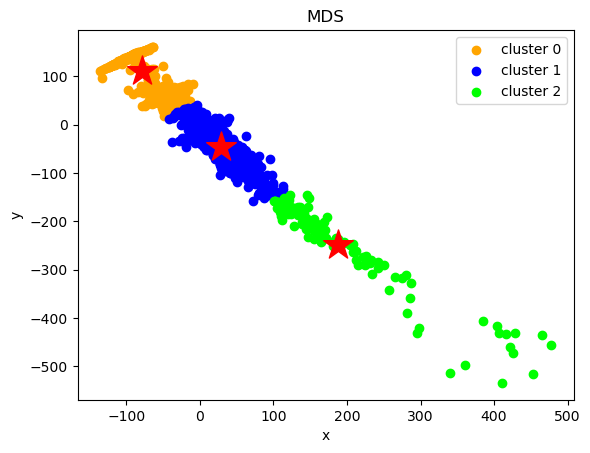

In [38]:
#Plot the transformation
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [39]:
#Apply T-SNE to the data and k means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


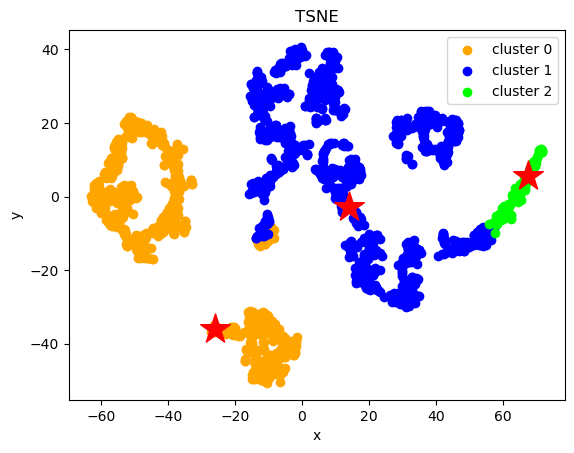

In [40]:
#Plot the transformation
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

I chose to explore K value of 3 as I believe it will provide enough interesting variety while also being a low enough K value to not negatively affect the model

# K value 3 Analysis

In [41]:
#Adding the cluster layer to the original dataframe
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [42]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,1,0,1,0,0,1,1
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,1,1,0,1,1
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,1,0,0,1,1,0,1,1
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,1,0,0,1,1,0,1,1
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,1,0,0,1,0,0,1,1


In [43]:
df.tail()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
1995,20.0,1.283472,16,9,0.864320,0.693147,-1,0.0,0,0,...,0,1,0,1,0,0,0,1,0,0
1996,28.0,0.569369,16,9,1.901403,0.693147,-1,0.0,0,0,...,0,1,0,1,0,0,0,1,0,0
1997,81.0,0.907800,17,9,0.673645,0.000000,-1,0.0,0,0,...,0,1,1,0,0,0,0,1,0,0
1998,46.0,1.545186,20,9,0.567555,0.000000,-1,0.0,0,0,...,0,1,1,0,0,1,0,1,0,0
1999,40.0,1.810978,22,9,0.622006,0.693147,-1,0.0,0,1,...,0,1,1,0,0,0,0,1,0,0


In [44]:
#Grouping via mean
df.groupby('cluster').mean()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently
cluster,,,,,,,,,,,,,,,,,,,,,
0,41.028649,0.894832,12.933151,6.327422,0.789525,0.410094,31.657572,0.384959,0.145975,0.023192,...,0.057299,0.210095,0.619372,0.514325,0.399727,0.008186,0.353342,0.061392,0.687585,0.380628
1,42.383609,0.837213,14.319093,3.938971,0.673169,0.504428,222.210113,0.836477,0.161290,0.023540,...,0.068003,0.224935,0.000000,0.591979,0.285963,0.006975,0.571055,0.173496,0.331299,1.000000
2,40.041667,0.937608,14.991667,7.075000,0.856761,0.428744,480.933333,0.732460,0.050000,0.008333,...,0.225000,0.266667,0.000000,0.458333,0.441667,0.008333,0.408333,0.050000,0.966667,0.100000


In [45]:
df['cluster'].value_counts()

1    1147
0     733
2     120
Name: cluster, dtype: int64

Conclusions

All 3 clusters have a similar age

Cluster 0 has been contacted the earliest during the month (day), been contacted the most recently (pdays) along with the lowest number of contacts before the current campaign (previous), Over 60% of this cluter were not successfully contacted via telephone or mobile in a previous campaign, likely to be new members (poutcome_nan) and have the lowest people taking out a housing loan (housing_yes)

Cluster 1 were contacted earliest in the year (month), had the most ammount of contacts performed during the campaign (campaign)
has the most number of contacts before the current campaign (previous),

Cluster 2 has a higher balance then the other clusters (balance), contacted the latest during the month (day), were contacted latest in the year (month), were contacted for the longest (duration), Has the most ammount of days since last contact (pdays). 96% of the cluster are subscribed to a term deposit. Only 5% of the cluster have a personal loan with 40% having a housing loan.

# Elbow method

# Plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k, This is already covered by the elbow method?

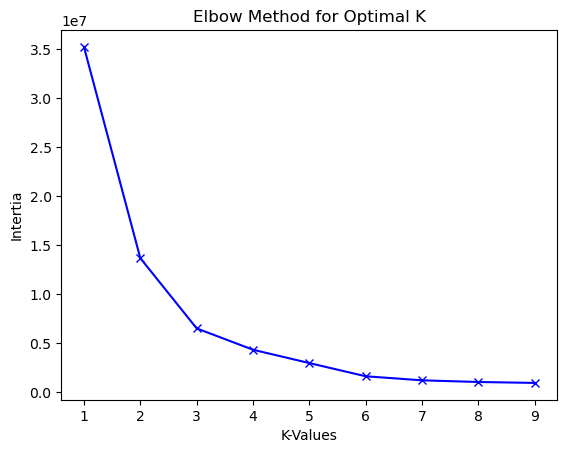

In [46]:
#Using the elbow method to plot the sum of squared distaces from the data points to the centers of the k-means 
#clusters from K values 1 to 10
intertia = []
k = range(1,10)

for i in k:
  model = cluster.KMeans(n_clusters=i).fit(data)
  intertia.append(model.inertia_)

plt.plot(k,intertia, 'bx-')
plt.xlabel('K-Values')
plt.ylabel('Intertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Using the Elbow method it appears that 3 is likely to be the optimal K value for this dataset, due to the plot looks akin to an arm with noticable bend or elbow at 3, 

# Silhouette method

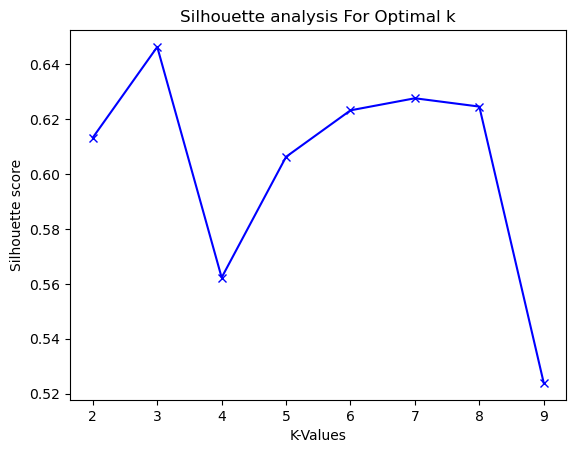

In [47]:
#Using slhouette to find the optimal K value, seeing if it matches the K value via the elbow method
silhouette_avg = []
k = range(2,10)

for i in k:
 model = cluster.KMeans(n_clusters=i).fit(data)
 cluster_labels = model.labels_
 silhouette_avg.append(silhouette_score(data, cluster_labels))
           
plt.plot(k,silhouette_avg, 'bx-')
plt.xlabel('K-Values')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [48]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,1,0,1,0,0,1,1
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,1,1,0,1,1
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,1,0,0,1,1,0,1,1
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,1,0,0,1,1,0,1,1
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,1,0,0,1,0,0,1,1


In [49]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [50]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,1,0,1,0,0,1,1
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,1,1,0,1,1
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,1,0,0,1,1,0,1,1
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,1,0,0,1,1,0,1,1
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,1,0,0,1,0,0,1,1


The silhouette score is maximised at k = 3, so 3 clusters is the optimal choice, matching with the above elbow method

In [51]:
#df.drop(columns=['cluster'])

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,0,1,0,1,0,0,1
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,0,1,1,0,1
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,0,1,0,0,1,1,0,1
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,0,1,0,0,1,1,0,1
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,1.283472,16,9,0.864320,0.693147,-1,0.000000,0,0,...,0,0,1,0,1,0,0,0,1,0
1996,28.0,0.569369,16,9,1.901403,0.693147,-1,0.000000,0,0,...,0,0,1,0,1,0,0,0,1,0
1997,81.0,0.907800,17,9,0.673645,0.000000,-1,0.000000,0,0,...,0,0,1,1,0,0,0,0,1,0
1998,46.0,1.545186,20,9,0.567555,0.000000,-1,0.000000,0,0,...,0,0,1,1,0,0,1,0,1,0


# Another clustering algorithm

In [67]:
#MeanShift unlike K-Means automatically selects the number of clusters so k does not need to be specified for this algorithm
clustered_data_sklearn = cluster.MeanShift().fit(data)

In [77]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [86]:
#The number of estimated optimal clusters will be calculated here for use within plotting by counting the labels
labels_unique = np.unique(clustered_data_sklearn.labels_)
k= len(labels_unique)
print("Number of estimated clusters : %d" % k)

Number of estimated clusters : 3


In [79]:
#Apply T-SNE to the data and k means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


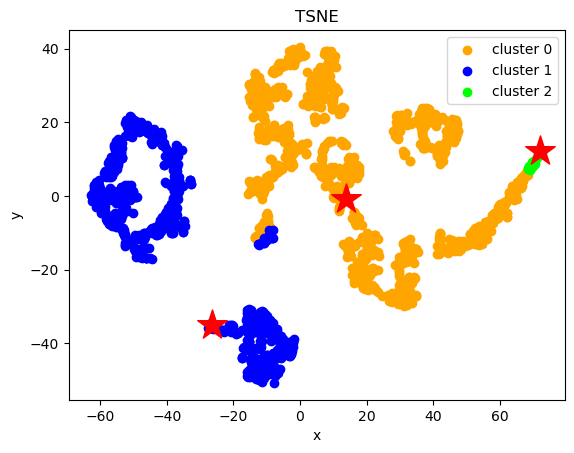

In [80]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [81]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,1,0,1,0,0,1,0
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,1,1,0,1,0
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,1,0,0,1,1,0,1,0
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,1,0,0,1,1,0,1,0
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,1,0,0,1,0,0,1,0


In [82]:
#Adding the cluster layer to the original dataframe
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [83]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently,cluster
0,32.0,0.668238,1,4,1.624770,0.693147,131,0.693147,0,0,...,0,0,0,1,0,1,0,0,1,0
1,39.0,0.768220,1,4,0.678012,0.693147,133,0.405465,0,0,...,0,0,0,0,0,1,1,0,1,0
2,59.0,0.873966,1,4,0.412593,0.693147,239,0.405465,0,0,...,0,0,1,0,0,1,1,0,1,0
3,47.0,0.670367,1,4,0.763570,0.000000,238,0.693147,1,0,...,0,0,1,0,0,1,1,0,1,0
4,54.0,0.864961,1,4,1.107159,0.000000,307,0.405465,0,0,...,0,0,1,0,0,1,0,0,1,0


In [84]:
#Grouping via mean
df.groupby('cluster').mean()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,pdaysNew_Contacted recently
cluster,,,,,,,,,,,,,,,,,,,,,
0,42.246166,0.843875,14.347054,4.154157,0.685951,0.499968,235.232446,0.830036,0.151735,0.022599,...,0.081517,0.232446,0.000000,0.580307,0.298628,0.006457,0.556094,0.164649,0.377724,0.939467
1,40.967033,0.895849,12.917582,6.321429,0.790143,0.411006,31.015110,0.379387,0.146978,0.023352,...,0.054945,0.211538,0.623626,0.513736,0.401099,0.008242,0.354396,0.061813,0.686813,0.376374
2,40.181818,0.938460,15.848485,7.757576,0.864894,0.362258,659.393939,0.754581,0.090909,0.000000,...,0.181818,0.060606,0.000000,0.545455,0.363636,0.030303,0.484848,0.030303,0.969697,0.000000


In [85]:
df['cluster'].value_counts()

0    1239
1     728
2      33
Name: cluster, dtype: int64

Comparing the cluster value from Mean Shift to K means, we see the clusters have slighly different values as well as a different order. Showing a disadvantage of this algorithm where it can fail to find the correct/correct sized clusters for some datasets.